In [82]:
from pathlib import Path

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [83]:
paths = sorted(Path('tests').glob('*.png'))

In [147]:
lower_blue = np.array([90, 120, 180])
upper_blue = np.array([130, 255, 255])

def extract_character(path: Path) -> np.ndarray:
    image = cv2.imread(path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print('there is no contours')
        return None

    blue_box = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(blue_box)
    
    character_region = image[y:y + h, x:x + w]

    gray = cv2.cvtColor(character_region, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    char_contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not char_contours:
        print('there is no char_contours')
        return None

    character = max(char_contours, key=cv2.contourArea)
    x2, y2, w2, h2 = cv2.boundingRect(character)

    final_character = character_region[y2:y2 + h2, x2:x2 + w2]
    final_character = final_character[75:-75, 75:-75]

    return final_character[..., ::-1]

IndexError: list index out of range

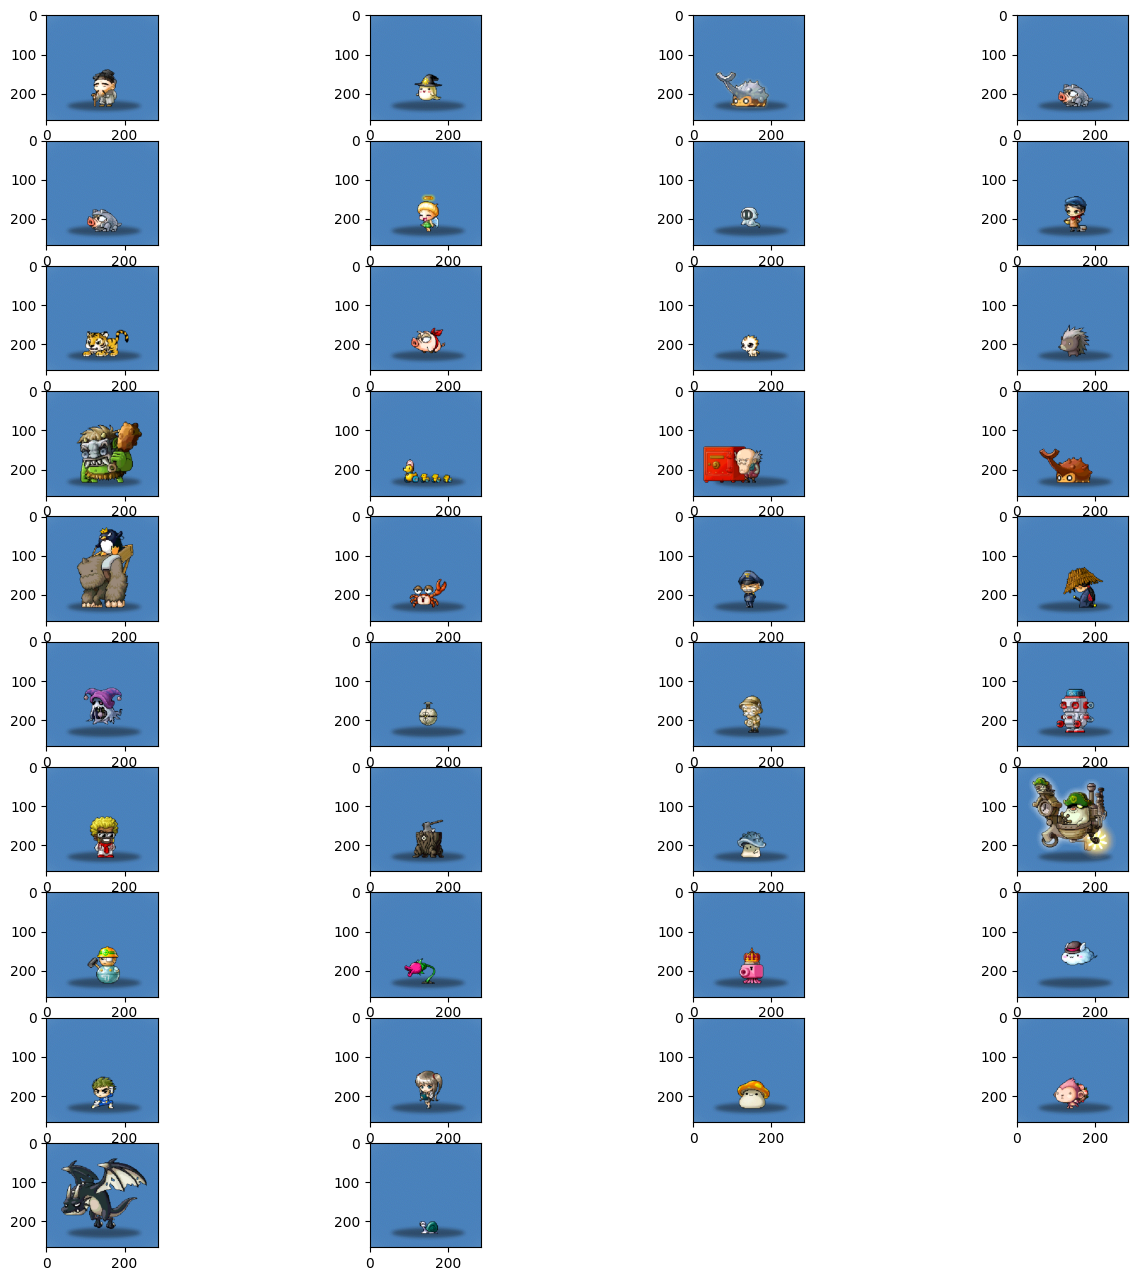

In [150]:
w = 10
h = 10

fig = plt.figure(figsize=(16, 16))

columns = 4
rows = 10
for i in range(1, columns * rows):
    img = extract_character(paths[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()

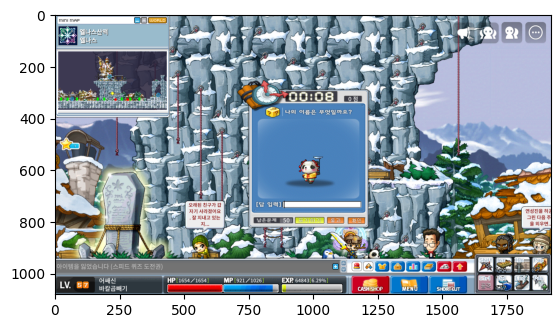

In [45]:
plt.imshow(cv2.imread(paths[0])[..., ::-1])

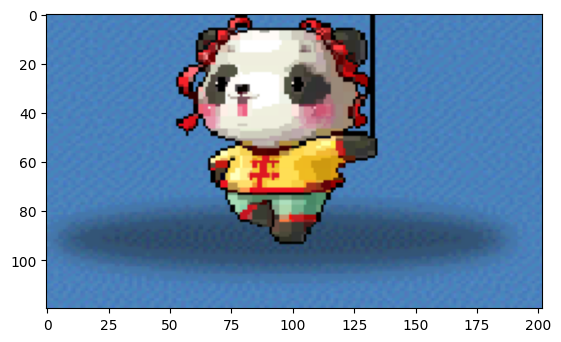

In [46]:
plt.imshow(character)